<a href="https://colab.research.google.com/github/Calm-leon/proyecto-an-lisis-de-datos/blob/main/Puchamon_final_PTMx2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentos del Proyecto de Ciencia de Datos: Análisis de Pokémon Legendario.

---------------
## Contexto
---------------

Dentro del Mundo Pokémon, se considera legendario aquel Pokémon generalmente raro, con poderes sobrenaturales y que destacan sobre el resto. La mayoría de estos Pokémon forman parte del proceso de creación del Mundo y han intervenido de una u otra manera en él. Así mismo, suelen ser realmente difíciles de avistar y mucho más todavía de capturar; pues raramente se muestran ante los humanos.  

Hace un tiempo se recolectaron los datos de las estadisticas de los 802 pokemones conocidos en ese entonces.


-----------------
## Objectivo
-----------------

Analizar las habilidades con las que debe contar un Pokémon para que sea considerado legendario. 
Existen pokemones que se comparan a la fuerza de los pokemones legendarios pero ¿Por qué estos no son legendarios?.


## P 1: Importación de bibliotecas a usar.

In [357]:
import numpy as np # Crea arreglos de grandes dimensiones y contiene funciones matemátematicas de alto nivel. 
import pandas as pd # Nos facilita la manipulación, tratamiento y análisis de los datos.
import seaborn as sns # Visualización de los datos.
import matplotlib.pyplot as plt # Trazado para graficos en dos dimenciones.
from matplotlib.ticker import PercentFormatter # Da formato de porcentajes a los graficos.
import scipy.stats as stats # Distribuciones estadisticas y .stats se utiliza para analizar la distribución normal.
%matplotlib inline 

## agregue este paqueteeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee
import math

## Respuesta 1:

- **NumPy** es una librería esencial para el análisis de datos y el cálculo científico. Hace arreglos manipulables de grandes dimensiones y contiene un gran número de funciones matemátematicas de alto nivel.
Suele importarse con el alias np de la siguiente forma: `import numpy as np`. 

- **Pandas** es la librería más utilizada para el análisis, tratamiento (leer y escribir datos en diferentes formatos) y manipulación de datos, sus estructuras básicas son marcos de datos y series. Se basa en NumPy y generalmente se importa con el alias pd como `import pandas as pd`.

- **Seaborn** es una librería que funciona como una interfaz para Matplotlib y está integrada con pandas. Se utiliza para la visualización de datos con la creación de trazados estadiaticos. Se importa normalmente con el alias sns de la siguiente forma: `import seaborn as sns`. 

- **Matplotlib** es una librería para crear diagramas matemáticos, estadísticos y científicos. La colección matplotlib.pyplot emula la forma de hacer las cosas de Matlab. Se importa con el alias plt como `import matplotlib.pyplot as plt` y el comando `%matplotlib inline` muestra los gráficos dentro del cuaderno Jupyter.

- **Scipy.stats**

In [358]:
#Abrimos la base de datos que nos ha proporcionado el Profesor Oak.
Puchamon =  pd.read_csv("https://raw.githubusercontent.com/Calm-leon/proyecto-an-lisis-de-datos/main/Puchamon.csv")
Puchamon

,Unnamed: 0,pokedex_number,name,attack,defense,height_m,hp,percentage_male,sp_attack,sp_defense,speed,type,weight_kg,generation,is_legendary
0,0,1,Bulbasaur,49,49,0.7,45,88.1,65,65,45,grass,6.9,1,0
1,1,2,Ivysaur,62,63,1.0,60,88.1,80,80,60,grass,13.0,1,0
2,2,3,Venusaur,100,123,2.0,80,88.1,122,120,80,grass,100.0,1,0
3,3,4,Charmander,52,43,0.6,39,88.1,60,50,65,fire,8.5,1,0
4,4,5,Charmeleon,64,58,1.1,58,88.1,80,65,80,fire,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,797,798,Kartana,181,131,0.3,59,NaN,59,31,109,grass,0.1,7,0
798,798,799,Guzzlord,101,53,5.5,223,NaN,97,53,43,dark,888.0,7,1
799,799,800,Necrozma,107,101,2.4,97,NaN,127,89,79,psychic,230.0,7,1
800,800,801,Magearna,95,115,1.0,80,NaN,130,115,65,steel,80.5,7,1


-------------------------
## Diccionaro del Conjunto de Datos según la Pokedex.
-------------------------

El conjunto de datos tiene la siguiente información: 

* pokedex_number: El número del Pokémon en la enciclopedia *Pokedex*.
* name: Nombre de la especie del Pokémon según su evolución.
* attack: Los puntos de vida que quita al dar un ataque.
* defense: Representa los puntos de vida que mantiene el Pokémon al recibir un ataque.
* height_m: Altura de la especie del Pokémon según su evolución (m).
* hp: Puntos de vida.
* percentage_male: Porcentaje que regula la probabilidad de que al nacer el Pokémon sea de género masculino.
* sp_attack: Representa la velocidad con la que el Pokémon da un ataque. 
* sp_defense: Representa la velocidad con la que el Pokémon anula los puntos de vida del ataque enemigo.
* speed: Representa la velocidad con la que el Pokémon se desplaza en combate. 
* type: Tipo de Pokémon. 
* weight_kg: Peso del Pokémon (kg). 
* generation: Cada que hay una gran ola de nuevos Pokemones la "Pokedex" es actualizada. La generación indica en qué actualización se incorpora cada Pokémon.
* is_legendary: ¿El Pokémon se considera legendario? (bit,0:no y 1:si).

## P2: ¿Qué series no son imprecindibles para determinar si un Pokémon es legendario o no?.

## Respuesta 2:

La información proporcionada en las series de *percentage_male*,*type* y *generation* no nos suministran ningún dato relevante para indagar si un Pokémon es legendario o no, teniendo en cuenta que a los Pokemones no los hace legendarios su género ni su tipo. Adicionalmente los datos de la serie *generation* tan solo nos brindan una idea del año en el que fueron avistados por primera vez los Pokemones, lo cual es irrelevante. Por lo tanto, las series mencionadas previamente fueron eliminadas de la base de datos. 

In [359]:
Puchamon=Puchamon.drop(['percentage_male','type','generation','Unnamed: 0'],axis=1)
Puchamon

,pokedex_number,name,attack,defense,height_m,hp,sp_attack,sp_defense,speed,weight_kg,is_legendary
0,1,Bulbasaur,49,49,0.7,45,65,65,45,6.9,0
1,2,Ivysaur,62,63,1.0,60,80,80,60,13.0,0
2,3,Venusaur,100,123,2.0,80,122,120,80,100.0,0
3,4,Charmander,52,43,0.6,39,60,50,65,8.5,0
4,5,Charmeleon,64,58,1.1,58,80,65,80,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,181,131,0.3,59,59,31,109,0.1,0
798,799,Guzzlord,101,53,5.5,223,97,53,43,888.0,1
799,800,Necrozma,107,101,2.4,97,127,89,79,230.0,1
800,801,Magearna,95,115,1.0,80,130,115,65,80.5,1


-----------------
## Limpieza del Conjunto de Datos.
-----------------


In [360]:
Puchamon3=Puchamon.drop(['attack','defense','height_m','hp','sp_attack','sp_defense','speed','weight_kg','is_legendary'],axis=1) 
Puchamon = pd.concat([Puchamon3,Puchamon.hp,Puchamon.attack,Puchamon.defense,Puchamon.height_m,Puchamon.weight_kg,Puchamon.speed,Puchamon.sp_attack,Puchamon.sp_defense,Puchamon.is_legendary], axis=1)
Puchamon

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.3,0.1,109,59,31,0
798,799,Guzzlord,223,101,53,5.5,888.0,43,97,53,1
799,800,Necrozma,97,107,101,2.4,230.0,79,127,89,1
800,801,Magearna,80,95,115,1.0,80.5,65,130,115,1


In [361]:
# Información del la base de datos Puchamon
Puchamon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 802 entries, 0 to 801
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pokedex_number  802 non-null    int64  
 1   name            802 non-null    object 
 2   hp              802 non-null    int64  
 3   attack          802 non-null    int64  
 4   defense         802 non-null    int64  
 5   height_m        802 non-null    float64
 6   weight_kg       802 non-null    float64
 7   speed           802 non-null    int64  
 8   sp_attack       802 non-null    int64  
 9   sp_defense      802 non-null    int64  
 10  is_legendary    802 non-null    int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 69.0+ KB


In [362]:
# Base final a tranajar
Puchamon

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...
797,798,Kartana,59,181,131,0.3,0.1,109,59,31,0
798,799,Guzzlord,223,101,53,5.5,888.0,43,97,53,1
799,800,Necrozma,97,107,101,2.4,230.0,79,127,89,1
800,801,Magearna,80,95,115,1.0,80.5,65,130,115,1


----------------------
# Análisis Descriptivo de Pokemones 
----------------------

In [363]:
# Base de datos 
FiltroLeg  =  Puchamon['is_legendary'] == 1
Legendarios= Puchamon[FiltroLeg]
Legendarios

Filtronormales =  Puchamon['is_legendary'] == 0
Normals= Puchamon[Filtronormales]
Normals

,pokedex_number,name,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense,is_legendary
0,1,Bulbasaur,45,49,49,0.7,6.9,45,65,65,0
1,2,Ivysaur,60,62,63,1.0,13.0,60,80,80,0
2,3,Venusaur,80,100,123,2.0,100.0,80,122,120,0
3,4,Charmander,39,52,43,0.6,8.5,65,60,50,0
4,5,Charmeleon,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...,...,...
783,784,Kommo-o,75,110,125,1.6,78.2,85,100,105,0
793,794,Buzzwole,107,139,139,2.4,333.6,79,53,53,0
795,796,Xurkitree,83,89,71,3.8,100.0,83,173,71,0
796,797,Celesteela,97,101,103,9.2,999.9,61,107,101,0


-------------------------------
## varianza etc Legendarios

En primer lugar, analizaremos las variables con el método `.describe` que nos arroja un objeto tipo dataframe donde las columnas son las variables del dataframe inicial y las filas corresponden al número total de los datos; la media; la desviación estándar; el mínimo dato; el primer, segundo y tercer cuartil y por último el máximo dato.

In [364]:
T =Legendarios.iloc[:,1:10].describe() #me da gran parte de la lista count... max

ModaLegendarios=Legendarios.mode(axis=0,numeric_only= True)
MdLegendarios=ModaLegendarios.head(1)
MdLegendarios = MdLegendarios.drop(['pokedex_number','is_legendary'],axis=1)
MdLegendarios                           #La moda de los legendarios 
T= T.append(MdLegendarios,ignore_index= True)
T.rename(index={0:'count',1:'mean',2:'std',3:'min',4:'25%',5:'50%',6:'75%',7:'max',8:'Moda'},inplace= True)

var=Legendarios.var()              #varianza
var=pd.DataFrame(var, columns = ['Var'])  
var = var.drop(['pokedex_number','is_legendary'],axis=0)
var = var.transpose( )
T= T.append(var,ignore_index= True)
T.rename(index={0:'count',1:'mean',2:'std',3:'min',4:'25%',5:'50%',6:'75%',7:'max',8:'Moda',9:'var'},inplace= True)
T

<ipython-input-364-a65f8394f7bc>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var=Legendarios.var()              #varianza


,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,97.403509,109.421053,99.719298,2.359649,211.807018,92.649123,115.701754,106.298246
std,31.870194,32.596531,28.559933,1.586197,235.911157,22.931179,34.891651,29.228756
min,43.000000,29.000000,31.000000,0.100000,0.100000,37.000000,29.000000,31.000000
25%,80.000000,90.000000,85.000000,1.500000,52.600000,85.000000,91.000000,90.000000
50%,91.000000,107.000000,100.000000,1.900000,187.000000,95.000000,120.000000,100.000000
75%,106.000000,130.000000,115.000000,3.200000,260.000000,108.000000,137.000000,120.000000
max,223.000000,180.000000,200.000000,7.000000,999.900000,151.000000,194.000000,200.000000
Moda,80.000000,100.000000,100.000000,2.000000,0.300000,90.000000,90.000000,100.000000
var,1015.709273,1062.533835,815.669799,2.516021,55654.073878,525.838972,1217.427318,854.320175


----------------------------
#varianza etc normale

In [365]:
T2 =Normals.iloc[:,1:10].describe() #me da gran parte de la lista count... max

ModaNormals = Normals.mode(axis=0,numeric_only= True)
MdNormals   = ModaNormals.head(1)
MdNormals   = MdNormals.drop(['pokedex_number','is_legendary'],axis=1)
MdNormals                          #La moda de los legendarios 
T2= T2.append(MdNormals,ignore_index= True)
T2.rename(index={0:'count',1:'mean',2:'std',3:'min',4:'25%',5:'50%',6:'75%',7:'max',8:'Moda'},inplace= True)

var=Normals.var()              #varianza
var=pd.DataFrame(var, columns = ['Var'])  
var = var.drop(['pokedex_number','is_legendary'],axis=0)
var = var.transpose( )
T2= T2.append(var,ignore_index= True)
T2.rename(index={0:'count',1:'mean',2:'std',3:'min',4:'25%',5:'50%',6:'75%',7:'max',8:'Moda',9:'var'},inplace= True)
T2

<ipython-input-365-94f00d5dbd29>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  var=Normals.var()              #varianza


,hp,attack,defense,height_m,weight_kg,speed,sp_attack,sp_defense
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,66.824161,75.472483,71.001342,1.061745,48.881879,64.366443,67.947651,68.242953
std,24.854360,30.833312,29.981513,0.961308,80.752140,28.347236,29.542091,25.948383
min,1.000000,5.000000,5.000000,0.100000,0.100000,5.000000,10.000000,20.000000
25%,50.000000,53.000000,50.000000,0.500000,8.500000,43.000000,45.000000,50.000000
50%,65.000000,71.000000,65.000000,0.900000,24.500000,60.000000,63.000000,65.000000
75%,79.000000,95.000000,86.000000,1.400000,55.800000,84.000000,85.000000,85.000000
max,255.000000,185.000000,230.000000,14.500000,999.900000,180.000000,175.000000,230.000000
Moda,60.000000,55.000000,50.000000,0.600000,15.000000,60.000000,40.000000,50.000000
var,617.739200,950.693126,898.891127,0.924113,6520.908152,803.565808,872.735159,673.318583


-----------------------
# Diagramas de caja y densidad para cada una de las variables de la base 


### Variable `hp`

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d75cb2e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d75cba550>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d75cb2af0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d75cbac10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d75cbaee0>],
 'means': []}

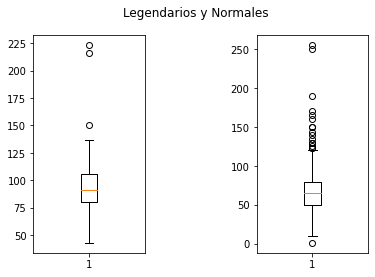

In [366]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['hp'])
ax2.boxplot(Normals['hp'])



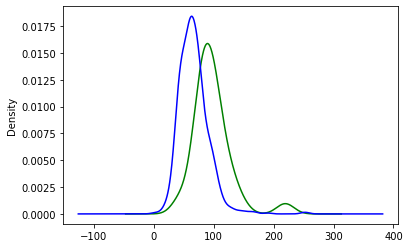

In [367]:

Legendarios.hp.plot.density(color='green')
Normals.hp.plot.density(color='blue')

##Medidas de tendencia central. ACUERDENSE DE CORREGIR EL DATO xd HOLIIIIII
Las medidas de tendencia central son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores. A continuación se presentará los valores para la variable `hp` de las medidas de tendencia central más utilizadas.

- La **media** de hp es $\bar{x}=$97,4. En otras palabras, en promedio cada Pokémon puede alcanzar u obtener 97,4 puntos de vida en combate.
- La mitad de los Pokemones obtiene puntos de vida menores a $Q_2=$91 (**mediana**), de la misma manera, la otra mitad tiene más de $Q_2=$91 puntos de vida.

### Variable `attack`

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d75bb7ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d75bc45e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d75bb7b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d75bc4ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d75bc4f70>],
 'means': []}

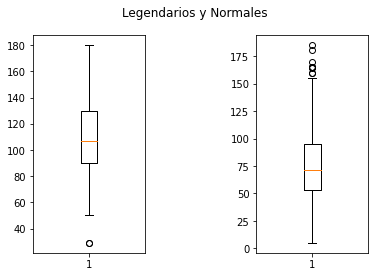

In [368]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['attack'])
ax2.boxplot(Normals['attack'])

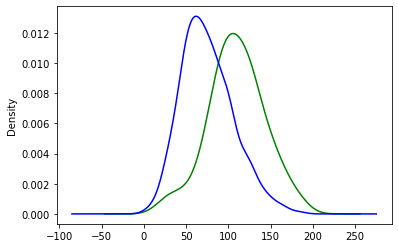

In [369]:
Legendarios.attack.plot.density(color='green')
Normals.attack.plot.density(color='blue')

##Medidas de tendencia central. ACUERDENSE DE CORREGIR EL DATO xd HOLIIIIII, holi de nuevo voy a copiar esto en todos pa que se guien XD pero ojo que este es el de hp
Las medidas de tendencia central son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores. A continuación se presentará los valores para la variable `hp` de las medidas de tendencia central más utilizadas.

- La **media** de hp es $\bar{x}=$97,4. En otras palabras, en promedio cada Pokémon puede alcanzar u obtener 97,4 puntos de vida en combate.
- La mitad de los Pokemones obtiene puntos de vida menores a $Q_2=$91 (**mediana**), de la misma manera, la otra mitad tiene más de $Q_2=$91 puntos de vida.

### Variable `defense`


{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d75ace5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d75aceca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d75ace280>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d75ad63a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d75ad6670>],
 'means': []}

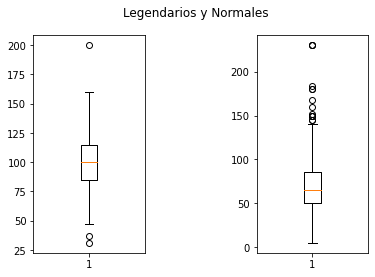

In [370]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['defense'])
ax2.boxplot(Normals['defense'])

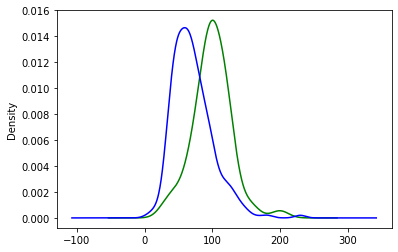

In [371]:
Legendarios.defense.plot.density(color='green')
Normals.defense.plot.density(color='blue')

##Medidas de tendencia central. ACUERDENSE DE CORREGIR EL DATO xd HOLIIIIII
Las medidas de tendencia central son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores. A continuación se presentará los valores para la variable `hp` de las medidas de tendencia central más utilizadas.

- La **media** de hp es $\bar{x}=$97,4. En otras palabras, en promedio cada Pokémon puede alcanzar u obtener 97,4 puntos de vida en combate.
- La mitad de los Pokemones obtiene puntos de vida menores a $Q_2=$91 (**mediana**), de la misma manera, la otra mitad tiene más de $Q_2=$91 puntos de vida.

### Variable `height_m`

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d759d6610>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d759d6cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d759d62b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d759613d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d759616a0>],
 'means': []}

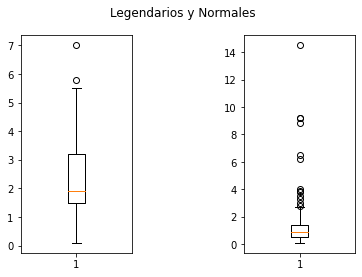

In [372]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['height_m'])
ax2.boxplot(Normals['height_m'])

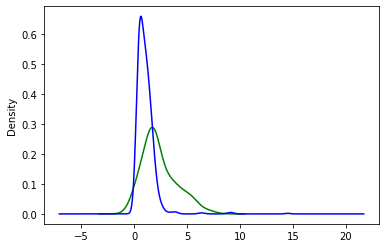

In [373]:
Legendarios.height_m.plot.density(color='green')
Normals.height_m.plot.density(color='blue')

##Medidas de tendencia central. ACUERDENSE DE CORREGIR EL DATO xd HOLIIIIII
Las medidas de tendencia central son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores. A continuación se presentará los valores para la variable `hp` de las medidas de tendencia central más utilizadas.

- La **media** de hp es $\bar{x}=$97,4. En otras palabras, en promedio cada Pokémon puede alcanzar u obtener 97,4 puntos de vida en combate.
- La mitad de los Pokemones obtiene puntos de vida menores a $Q_2=$91 (**mediana**), de la misma manera, la otra mitad tiene más de $Q_2=$91 puntos de vida.

### Variable `weight_kg`

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d7585fb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d7586b250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d7585f7f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d7586b910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d7586bbe0>],
 'means': []}

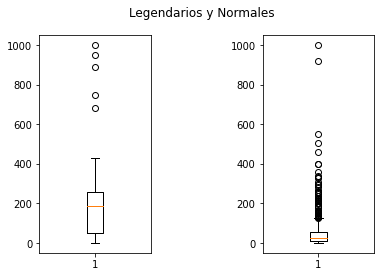

In [374]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['weight_kg'])
ax2.boxplot(Normals['weight_kg'])

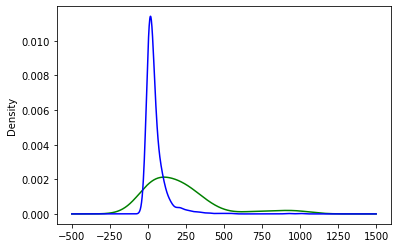

In [375]:
Legendarios.weight_kg.plot.density(color='green')
Normals.weight_kg.plot.density(color='blue')

##Medidas de tendencia central. ACUERDENSE DE CORREGIR EL DATO xd HOLIIIIII
Las medidas de tendencia central son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores. A continuación se presentará los valores para la variable `hp` de las medidas de tendencia central más utilizadas.

- La **media** de hp es $\bar{x}=$97,4. En otras palabras, en promedio cada Pokémon puede alcanzar u obtener 97,4 puntos de vida en combate.
- La mitad de los Pokemones obtiene puntos de vida menores a $Q_2=$91 (**mediana**), de la misma manera, la otra mitad tiene más de $Q_2=$91 puntos de vida.[texto del vínculo](https://)

### Variable `speed`

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d75762fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d7576d6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d75762c40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d7576dd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d7577b070>],
 'means': []}

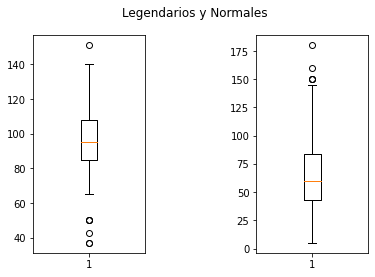

In [376]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['speed'])
ax2.boxplot(Normals['speed'])

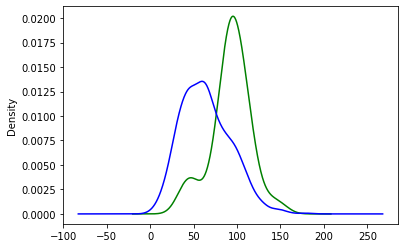

In [377]:
Legendarios.speed.plot.density(color='green')
Normals.speed.plot.density(color='blue')

##Medidas de tendencia central. ACUERDENSE DE CORREGIR EL DATO xd HOLIIIIII
Las medidas de tendencia central son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores. A continuación se presentará los valores para la variable `hp` de las medidas de tendencia central más utilizadas.

- La **media** de hp es $\bar{x}=$97,4. En otras palabras, en promedio cada Pokémon puede alcanzar u obtener 97,4 puntos de vida en combate.
- La mitad de los Pokemones obtiene puntos de vida menores a $Q_2=$91 (**mediana**), de la misma manera, la otra mitad tiene más de $Q_2=$91 puntos de vida.

### Variable `sp_attack`

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d7567d340>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d7567da00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d75676fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d756870d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d756873a0>],
 'means': []}

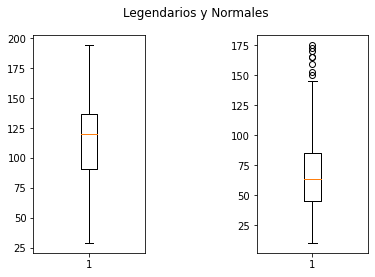

In [378]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['sp_attack'])
ax2.boxplot(Normals['sp_attack'])

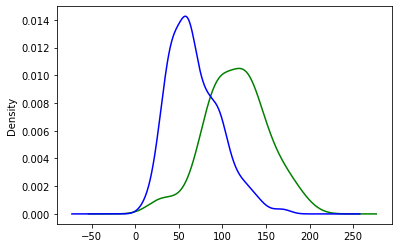

In [379]:
Legendarios.sp_attack.plot.density(color='green')
Normals.sp_attack.plot.density(color='blue')

##Medidas de tendencia central. ACUERDENSE DE CORREGIR EL DATO xd HOLIIIIII
Las medidas de tendencia central son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores. A continuación se presentará los valores para la variable `hp` de las medidas de tendencia central más utilizadas.

- La **media** de hp es $\bar{x}=$97,4. En otras palabras, en promedio cada Pokémon puede alcanzar u obtener 97,4 puntos de vida en combate.
- La mitad de los Pokemones obtiene puntos de vida menores a $Q_2=$91 (**mediana**), de la misma manera, la otra mitad tiene más de $Q_2=$91 puntos de vida.

### Variable `sp_defense`

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d75584f40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d7558e640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d75584be0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d7558ed00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d7558efd0>],
 'means': []}

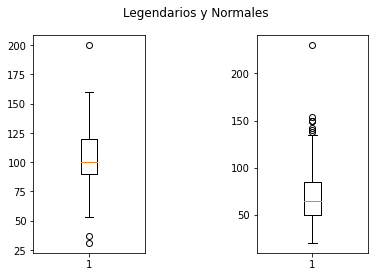

In [380]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Legendarios y Normales')
fig.subplots_adjust(hspace=0, wspace=1)    #aca le mueves la distancia 
ax1.boxplot(Legendarios['sp_defense'])
ax2.boxplot(Normals['sp_defense'])

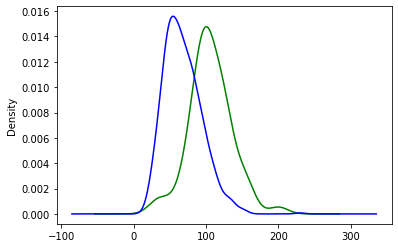

In [381]:
Legendarios.sp_defense.plot.density(color='green')
Normals.sp_defense.plot.density(color='blue')

##Medidas de tendencia central. ACUERDENSE DE CORREGIR EL DATO xd HOLIIIIII
Las medidas de tendencia central son medidas estadísticas que pretenden resumir en un solo valor a un conjunto de valores. A continuación se presentará los valores para la variable `hp` de las medidas de tendencia central más utilizadas.

- La **media** de hp es $\bar{x}=$97,4. En otras palabras, en promedio cada Pokémon puede alcanzar u obtener 97,4 puntos de vida en combate.
- La mitad de los Pokemones obtiene puntos de vida menores a $Q_2=$91 (**mediana**), de la misma manera, la otra mitad tiene más de $Q_2=$91 puntos de vida.

# Matriz de correlación de la base Pokemones

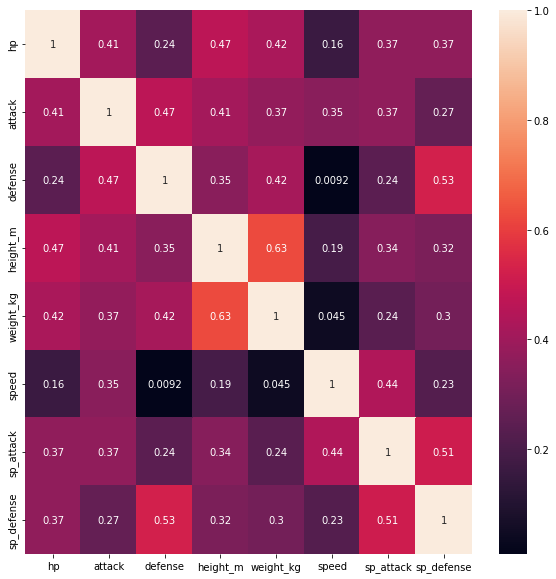

In [382]:
# Creación de la Matiz
corr_matrix = Puchamon.iloc[:,1:10].corr()
corr_matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot = True)
# Visualización de la matriz
plt.show()

__________________________________
#Regresion logistica, Analisis predictivo


In [383]:
Puchamon=Puchamon.drop(['pokedex_number','name'],axis=1)  #me quiero quedar solo con los datos numericos
[n,m]=Puchamon.shape #me dice el tamaño que me quedo
Puchamon.columns =[1,2,3,4,5,6,7,8,9] #nombro las columnas como numeros para usar un for
Puchamon

,1,2,3,4,5,6,7,8,9
0,45,49,49,0.7,6.9,45,65,65,0
1,60,62,63,1.0,13.0,60,80,80,0
2,80,100,123,2.0,100.0,80,122,120,0
3,39,52,43,0.6,8.5,65,60,50,0
4,58,64,58,1.1,19.0,80,80,65,0
...,...,...,...,...,...,...,...,...,...
797,59,181,131,0.3,0.1,109,59,31,0
798,223,101,53,5.5,888.0,43,97,53,1
799,97,107,101,2.4,230.0,79,127,89,1
800,80,95,115,1.0,80.5,65,130,115,1


In [384]:
#Me hace la primer ecuacion normal de Gauus
A = []
for t in range(m+1):
     if t == 0:
        X = [n]
        A = A+X
     else: 
        X = [Puchamon[t].sum()]
        A = A+X
A = pd.DataFrame(A)       

In [385]:
#me hace el resto de ecuaciones normales de Gauus para un sistema de ecuaciones
for t in range(1,m+1):
  NN=Puchamon
  B = [Puchamon[t].sum()]
  Puchamon2 = []
  Puchamon2 = pd.DataFrame(Puchamon2)

  for i in range(1,m):
      Puchamon2[i] = Puchamon[i]*NN[t]
      X = [Puchamon2[i].sum()]
      B = B + X 
  B = pd.DataFrame(B)
  A = pd.concat([A,B], axis=1)
A    #A es la matriz aumentada del sistema de ecuaciones lineales (La novena ecuacion es solo porque el ciclo tiene que acabar en uno mas)

,0,0,0,0,0,0,0,0,0,0
0,802.0,55336.0,62464.0,58580.0,925.50,48490.00,53234.0,57216.0,56900.0,57.0
1,55336.0,4384036.0,4591294.0,4201269.0,74549.90,4321291.30,3772860.0,4200392.0,4144870.0,5552.0
2,62464.0,4591294.0,5692868.0,4934310.0,83437.90,4821128.90,4409198.0,4763359.0,4623420.0,6237.0
3,58580.0,4201269.0,4934310.0,5036944.0,76900.80,4656368.10,3894892.0,4372602.0,4518926.0,5684.0
4,925.5,74549.9,83437.9,76900.8,1985.65,114173.41,66206.1,75563.1,73318.4,134.5
5,48490.0,4321291.3,4821128.9,4656368.1,114173.41,12305461.32,3331373.9,4132738.4,4167872.7,12073.0
6,53234.0,3772860.0,4409198.0,3894892.0,66206.10,3331373.90,4203144.0,4127220.0,3923831.0,5281.0
7,57216.0,4200392.0,4763359.0,4372602.0,75563.10,4132738.40,4127220.0,4920122.0,4430106.0,6595.0
8,56900.0,4144870.0,4623420.0,4518926.0,73318.40,4167872.70,3923831.0,4430106.0,4662392.0,6059.0
9,57.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [386]:
A=A.drop([9],axis=0)              #La novena ecuacion que tenemos no es necesaria la quitamos
A.columns =[1,2,3,4,5,6,7,8,9,'B'] #nombramos columnas
A1=A
A = A.drop(['B'],axis=1)          #quitamos la columna de soluciones 
B = A1.drop([1,2,3,4,5,6,7,8,9],axis=1) #y separamos la columna de soluciones

Betas = np.linalg.solve(A,B) #nos soluciona el sistema de ecuaciones
Betas = pd.DataFrame(Betas) #el dataframe de las soluciones
print(Betas)

          0
0 -0.259130
1  0.000443
2  0.000086
3 -0.000041
4 -0.005453
5  0.000694
6  0.001107
7  0.001379
8  0.001245


In [387]:
b0= Betas.iloc[0] #nombro a cada una de las soluciones para hacer la funcion
b1= Betas.iloc[1]
b2= Betas.iloc[2]
b3= Betas.iloc[3]
b4= Betas.iloc[4]
b5= Betas.iloc[5]
b6= Betas.iloc[6]
b7= Betas.iloc[7]
b8= Betas.iloc[8]
def WhoisthatPokemon(x1,x2,x3,x4,x5,x6,x7,x8):
  y = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6 + b7*x7 + b8*x8 #esta es la regresion lineal
  p = 1/(1+ math.exp(-y)) #esta la transformacion de regresion lineal a regresion logistica
  return p

In [388]:
WhoisthatPokemon(80,	95,	115,	1.0,	80.5,	65,	130,	115) #Prueba de la funcion

0.5559397182887382

---------------------------
#Analisis del resultado de las predicciones

In [389]:
#Recordar que T tiene los datos estadisticos de los pokeones legendarios, usar el valor medio osea el mean segunda fila
mean=T.iloc[1]

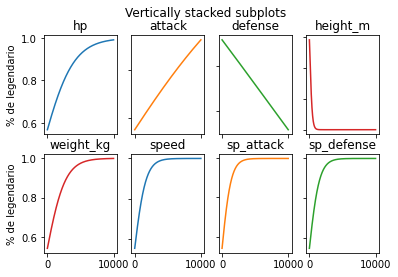

In [390]:
L = 10000              #si van a hacer pruebas bajen esto pa que no se demore el final dejenlo alto pa que se vea el cambio
x = np.linspace(0,L,L+1)
y0 = []
y1 = []
y2 = []
y3 = []
y4 = []
y5 = []
y6 = []
y7 = []
for i in range(0,L+1):
  y = [WhoisthatPokemon(i,mean[1],mean[2],mean[3],mean[4],mean[5],mean[6],mean[7])]
  y0 = y0+y

  y = [WhoisthatPokemon(mean[0],i,mean[2],mean[3],mean[4],mean[5],mean[6],mean[7])]
  y1 = y1+y

  y = [WhoisthatPokemon(mean[0],mean[1],i,mean[3],mean[4],mean[5],mean[6],mean[7])]
  y2 = y2+y

  y = [WhoisthatPokemon(mean[0],mean[1],mean[2],i,mean[4],mean[5],mean[6],mean[7])]
  y3 = y3+y

  y = [WhoisthatPokemon(mean[0],mean[1],mean[2],mean[3],i,mean[5],mean[6],mean[7])]
  y4 = y4+y

  y = [WhoisthatPokemon(mean[0],mean[1],mean[2],mean[3],mean[4],i,mean[6],mean[7])]
  y5 = y5+y

  y = [WhoisthatPokemon(mean[0],mean[1],mean[2],mean[3],mean[4],mean[5],i,mean[7])]
  y6 = y6+y

  y = [WhoisthatPokemon(mean[0],mean[1],mean[2],mean[3],mean[4],mean[5],mean[6],i)]
  y7 = y7+y

fig, axs = plt.subplots(2, 4)
fig.subplots_adjust(hspace=0.2, wspace=0.2) #aca se mueve la distancia entre graficas
axs[0, 0].plot(x, y0)
axs[0, 0].set_title('hp')
axs[0, 1].plot(x, y1, 'tab:orange')
axs[0, 1].set_title('attack')
axs[0, 2].plot(x, y2, 'tab:green')
axs[0, 2].set_title('defense')
axs[0, 3].plot(x, y3, 'tab:red')
axs[0, 3].set_title('height_m')
axs[1, 0].plot(x, y4, 'tab:red')
axs[1, 0].set_title('weight_kg')
axs[1, 1].plot(x, y5, 'tab:blue')
axs[1, 1].set_title('speed')
axs[1, 2].plot(x, y6, 'tab:orange')
axs[1, 2].set_title('sp_attack')
axs[1, 3].plot(x, y7, 'tab:green')
axs[1, 3].set_title('sp_defense')
fig.suptitle('Vertically stacked subplots')
for ax in axs.flat:
    ax.set( ylabel='% de legendario')

for ax in axs.flat:
    ax.label_outer()



